## Univariate Linear Regression on the California Housing Prices Dataset
### 1. Introduction
The goal of this report is:
* Train my first machine learning model - univariate linear regression model
* Run linear regression using three models
* Compare the models in terms of their goodness-of-fit

Imports


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### 2. Data Collection
Data is from Kaggle: https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [2]:
df_housing = pd.read_csv('data/housing.csv')
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 3. Exploratory Data Analysis (EDA)
### 3.1 Statistics

In [3]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 3.2 Scatter plots 

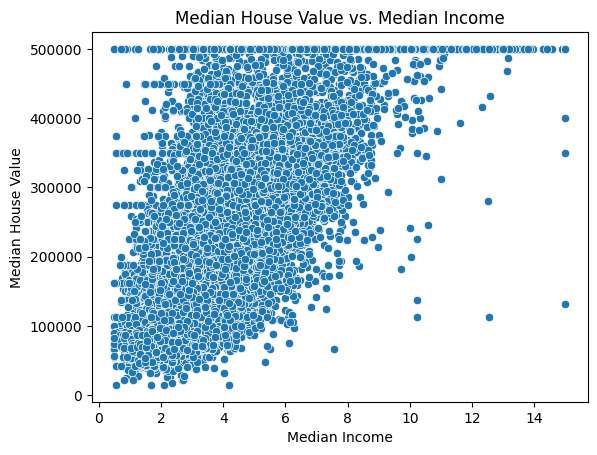

In [4]:
sns.scatterplot(data=df_housing, x='median_income', y='median_house_value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median House Value vs. Median Income')
plt.show()

Median house value tends to be higher with higher median income. However, there are some outliers, e.g low median house value with high median income, or high median house value with low median income

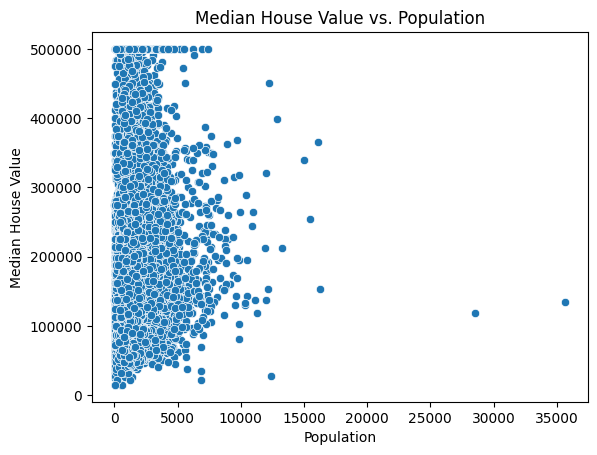

In [5]:
sns.scatterplot(data=df_housing, x='population', y='median_house_value')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.title('Median House Value vs. Population')
plt.show()

Population does not affact the median house value that much.

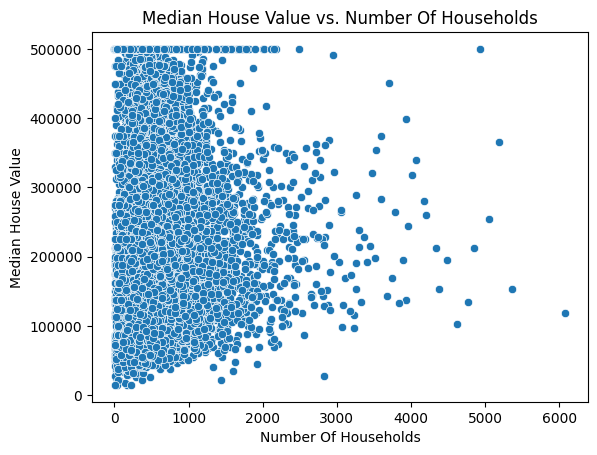

In [6]:
sns.scatterplot(data=df_housing, x='households', y='median_house_value')
plt.xlabel('Number Of Households')
plt.ylabel('Median House Value')
plt.title('Median House Value vs. Number Of Households')
plt.show()

Number of households affects the median house value a little bit. For majority of data, number of households does not have any effect on the median house value.

### 3.3 Variables 
1. Median house value:  the middle point of all house values with range from 14999 to 500001
2. Median income:  the middle point of all incomes with range from 0.4999 to 15.0001
3. Population: number of people with range from 3 to 35682. Few population means remote rurual area, while more population mean city or town
4. Number of households: total number of separate living units with range from 1 to 6082

## 4. Linear regressions

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### 4.1 Median house value vs. median income

In [8]:
# LinearRegression
X = df_housing[['median_income']]
y = df_housing[['median_house_value']]
# split the data randomly 80/20
X_train_linreg, X_test_linreg, y_train_linreg, y_test_linreg = train_test_split(X, y, test_size=0.2, random_state=42)
# fit the data using model
linreg = LinearRegression()
linreg.fit(X_train_linreg, y_train_linreg)
y_pred_test = linreg.predict(X_test_linreg)
# calculate metrics
linreg_mae  = mean_absolute_error(y_test_linreg, y_pred_test)
linreg_mse  = mean_squared_error(y_test_linreg, y_pred_test)

print("Intercept:", linreg.intercept_)
print("Slope:", linreg.coef_)
print(f"MAE : {linreg_mae:,.0f}")
print(f"MSE : {linreg_mse:,.0f}")

Intercept: [44459.72916908]
Slope: [[41933.84939381]]
MAE : 62,991
MSE : 7,091,157,772


### 4.2 Median house value vs. population

In [9]:
# Lasso
X = df_housing[['population']]
y = df_housing[['median_house_value']]
# split the data randomly 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# fit the data using model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_test = lasso.predict(X_test)
# calculate metrics
lasso_mae  = mean_absolute_error(y_test, y_pred_test)
lasso_mse  = mean_squared_error(y_test, y_pred_test)

print("Intercept:", lasso.intercept_)
print("Slope:", lasso.coef_)
print(f"MAE : {lasso_mae:,.0f}")
print(f"MSE : {lasso_mse:,.0f}")

Intercept: [210970.69623444]
Slope: [-2.64712717]
MAE : 90,589
MSE : 13,102,870,667


### 4.3 Median house value vs. number of households

In [10]:
# Ridge
X = df_housing[['households']]
y = df_housing[['median_house_value']]
# split the data randomly 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# fit the data using model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_test = ridge.predict(X_test)
# calculate metrics
ridge_mae  = mean_absolute_error(y_test, y_pred_test)
ridge_mse  = mean_squared_error(y_test, y_pred_test)

print("Intercept:", ridge.intercept_)
print("Slope:", ridge.coef_)
print(f"MAE : {ridge_mae:,.0f}")
print(f"MSE : {ridge_mse:,.0f}")

Intercept: [197526.36920118]
Slope: [19.33715499]
MAE : 90,218
MSE : 13,035,578,955


## 5. Linear regressions comparision


In [11]:
from IPython.display import Markdown
table = f"""
| Model         | Intercept      | Slope         | Mean Absolute Error   | Mean Squared Error |
|---------------|---------------|---------------|---------------|---------------|
| **LinearRegression** | {linreg.intercept_} | {linreg.coef_} | {linreg_mae} | {linreg_mse} |
| **Lasso**            | {lasso.intercept_} | {lasso.coef_} | {lasso_mae} | {lasso_mse} |
| **Ridge**            | {ridge.intercept_} | {ridge.coef_} | {ridge_mae} | {ridge_mse} |
"""

display(Markdown(table))


| Model         | Intercept      | Slope         | Mean Absolute Error   | Mean Squared Error |
|---------------|---------------|---------------|---------------|---------------|
| **LinearRegression** | [44459.72916908] | [[41933.84939381]] | 62990.86530093761 | 7091157771.76555 |
| **Lasso**            | [210970.69623444] | [-2.64712717] | 90588.87772445178 | 13102870667.369444 |
| **Ridge**            | [197526.36920118] | [19.33715499] | 90218.2581382062 | 13035578954.78937 |


## 6. Scatter plots with result

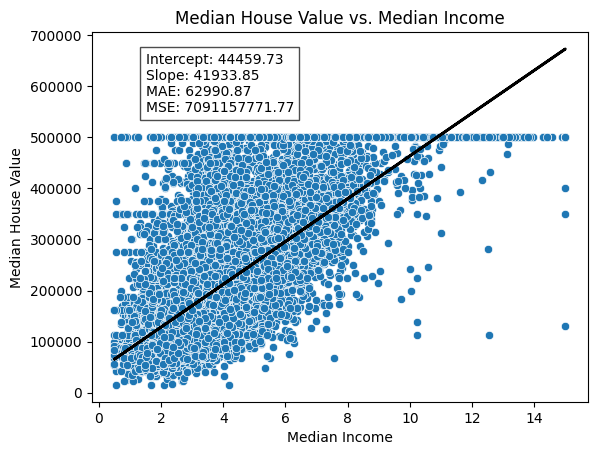

In [12]:
sns.scatterplot(data=df_housing, x='median_income', y='median_house_value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median House Value vs. Median Income')
plt.plot(df_housing[["median_income"]], linreg.predict(df_housing[["median_income"]]), color="black", linewidth=2)
textbox = (
    f"Intercept: {linreg.intercept_[0]:.2f}\n"
    f"Slope: {linreg.coef_[0][0]:.2f}\n"
    f"MAE: {linreg_mae:.2f}\n"
    f"MSE: {linreg_mse:.2f}"
)
plt.text(
    x=1.5, y=550000,
    s=textbox,
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

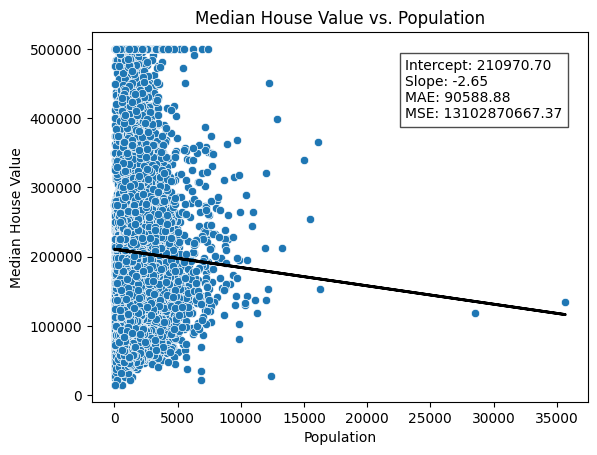

In [13]:
sns.scatterplot(data=df_housing, x='population', y='median_house_value')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.title('Median House Value vs. Population')
plt.plot(df_housing[["population"]], lasso.predict(df_housing[["population"]]), color="black", linewidth=2)
textbox = (
    f"Intercept: {lasso.intercept_[0]:.2f}\n"
    f"Slope: {lasso.coef_[0]:.2f}\n"
    f"MAE: {lasso_mae:.2f}\n"
    f"MSE: {lasso_mse:.2f}"
)
plt.text(
    x=23000, y=400000,
    s=textbox,
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

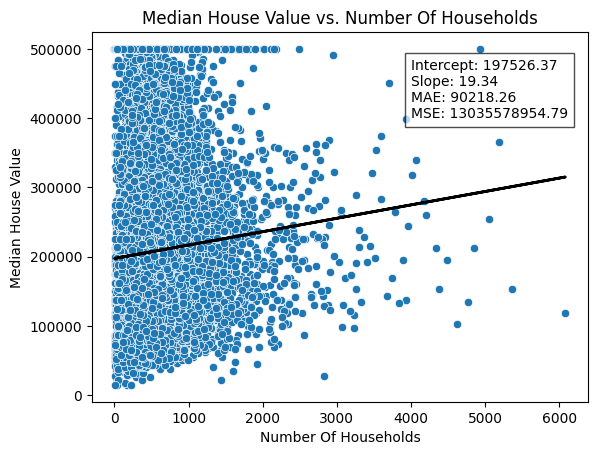

In [14]:
sns.scatterplot(data=df_housing, x='households', y='median_house_value')
plt.xlabel('Number Of Households')
plt.ylabel('Median House Value')
plt.title('Median House Value vs. Number Of Households')
plt.plot(df_housing[["households"]], ridge.predict(df_housing[["households"]]), color="black", linewidth=2)
textbox = (
    f"Intercept: {ridge.intercept_[0]:.2f}\n"
    f"Slope: {ridge.coef_[0]:.2f}\n"
    f"MAE: {ridge_mae:.2f}\n"
    f"MSE: {ridge_mse:.2f}"
)
plt.text(
    x=4000, y=400000,
    s=textbox,
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

## 7. Summary
* All three linear regression models are pretty fast. Fitting the data (about 16k rows) in less than 1 second.
* All three models can decide the interception and slope that are best fit for the training data. However, this does not mean it is capable to provide excellent prediction.
* Even when there is no obvious linear relationship between the independent variable and dependent variable, the linear regression models still produce a linear equation, which can be misleading.
* Because we use different models on different dependent variables, it is hard to compare the models in terms of their goodness-of-fit. We need to run three models on the same dependent/independent variables set to compare. The model with the lowest MSE/MAE is the best.
